In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('processed_smartphones.csv')

## Understanding the Data :

In [3]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,is_ram_gb,storage,is_storage_gb,battery_capacity,...,is_Vo5G,wifi,ngc,irblaster,display_size,display_height,display_width,rear_camera,front_camera,price
0,OnePlus,Snapdragon,8.0,3.2,Android,12,1,256,1,5000,...,0,1,1,0,6.70,3216.0,1440.0,50.0,16.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.59,2412.0,1080.0,64.0,16.0,19989
2,Samsung,Exynos,8.0,2.4,Android,4,1,64,1,5000,...,0,1,0,0,6.60,2408.0,1080.0,50.0,13.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.55,2400.0,1080.0,50.0,16.0,14999
4,Realme,Dimensity,8.0,2.6,Android,6,1,128,1,5000,...,0,1,0,0,6.70,2412.0,1080.0,108.0,16.0,24999


In [4]:
df.shape

(1014, 23)

In [5]:
# missing values percentage
df.isnull().sum()

brand               0
processor_name      0
processor_cores     0
processor_speed     0
os                  0
ram                 0
is_ram_gb           0
storage             0
is_storage_gb       0
battery_capacity    0
DualSim             0
Volte               0
is_5G               0
is_Vo5G             0
wifi                0
ngc                 0
irblaster           0
display_size        0
display_height      0
display_width       0
rear_camera         0
front_camera        0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,is_ram_gb,storage,is_storage_gb,battery_capacity,...,is_Vo5G,wifi,ngc,irblaster,display_size,display_height,display_width,rear_camera,front_camera,price
0,OnePlus,Snapdragon,8.0,3.2,Android,12,1,256,1,5000,...,0,1,1,0,6.70,3216.0,1440.0,50.0,16.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.59,2412.0,1080.0,64.0,16.0,19989
2,Samsung,Exynos,8.0,2.4,Android,4,1,64,1,5000,...,0,1,0,0,6.60,2408.0,1080.0,50.0,13.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.55,2400.0,1080.0,50.0,16.0,14999
4,Realme,Dimensity,8.0,2.6,Android,6,1,128,1,5000,...,0,1,0,0,6.70,2412.0,1080.0,108.0,16.0,24999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1011 non-null   object 
 1   processor_name    1011 non-null   object 
 2   processor_cores   1011 non-null   float64
 3   processor_speed   1011 non-null   float64
 4   os                1011 non-null   object 
 5   ram               1011 non-null   int64  
 6   is_ram_gb         1011 non-null   int64  
 7   storage           1011 non-null   int64  
 8   is_storage_gb     1011 non-null   int64  
 9   battery_capacity  1011 non-null   int64  
 10  DualSim           1011 non-null   int64  
 11  Volte             1011 non-null   int64  
 12  is_5G             1011 non-null   int64  
 13  is_Vo5G           1011 non-null   int64  
 14  wifi              1011 non-null   int64  
 15  ngc               1011 non-null   int64  
 16  irblaster         1011 non-null   int64  


## Exploratory Data Analysis :

### 1. Brand :

In [10]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,is_ram_gb,storage,is_storage_gb,battery_capacity,...,is_Vo5G,wifi,ngc,irblaster,display_size,display_height,display_width,rear_camera,front_camera,price
0,OnePlus,Snapdragon,8.0,3.2,Android,12,1,256,1,5000,...,0,1,1,0,6.70,3216.0,1440.0,50.0,16.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.59,2412.0,1080.0,64.0,16.0,19989
2,Samsung,Exynos,8.0,2.4,Android,4,1,64,1,5000,...,0,1,0,0,6.60,2408.0,1080.0,50.0,13.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android,6,1,128,1,5000,...,0,1,0,0,6.55,2400.0,1080.0,50.0,16.0,14999
4,Realme,Dimensity,8.0,2.6,Android,6,1,128,1,5000,...,0,1,0,0,6.70,2412.0,1080.0,108.0,16.0,24999


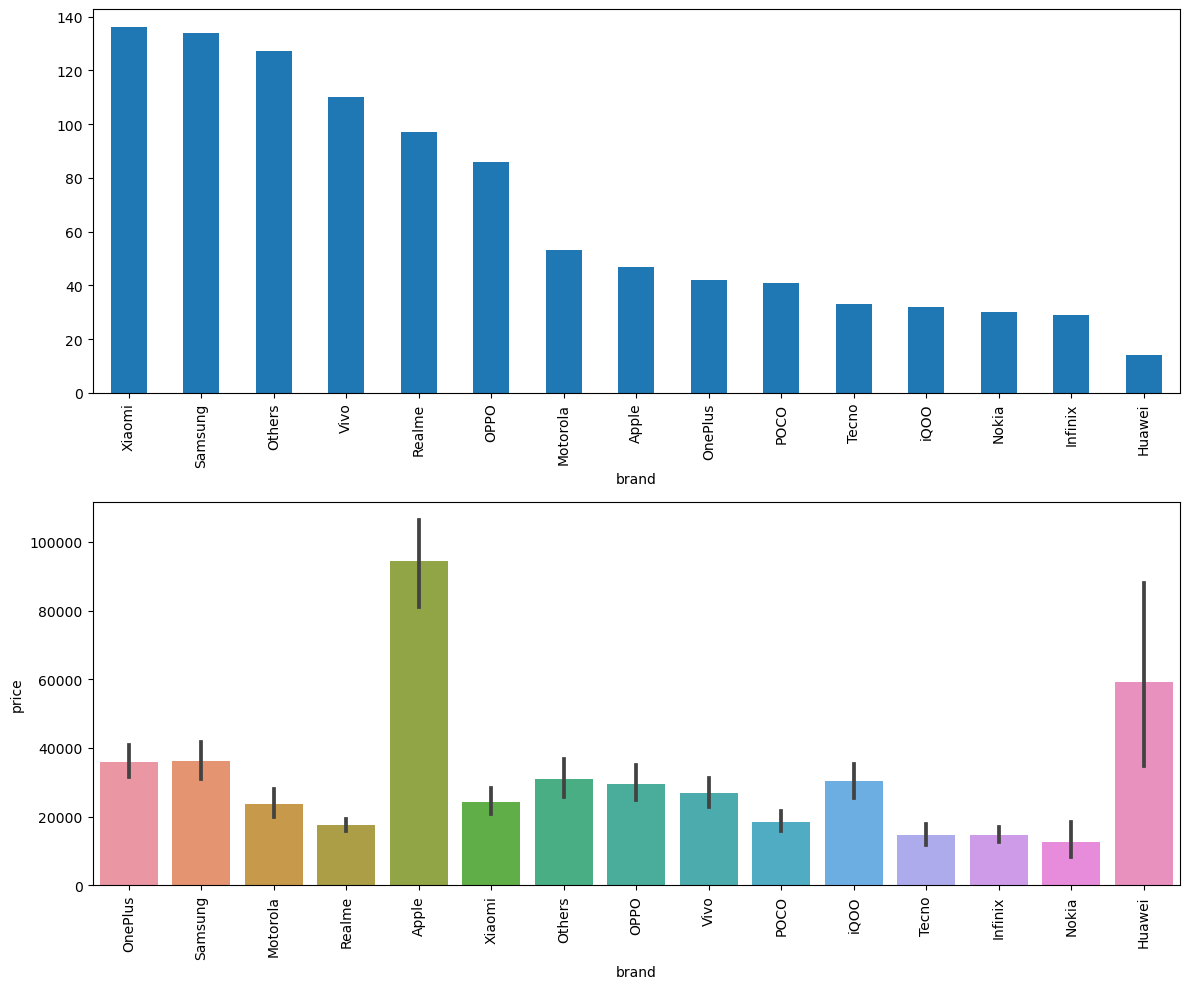

In [11]:
plt.figure(figsize=(12,10))

plt.subplot(211)
df['brand'].value_counts().plot(kind='bar')
plt.tight_layout()

plt.subplot(212)
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### 2. Processor :

In [12]:
print(df['processor_name'].dtype)
print(df['processor_cores'].dtype)
print(df['processor_speed'].dtype)

object
float64
float64


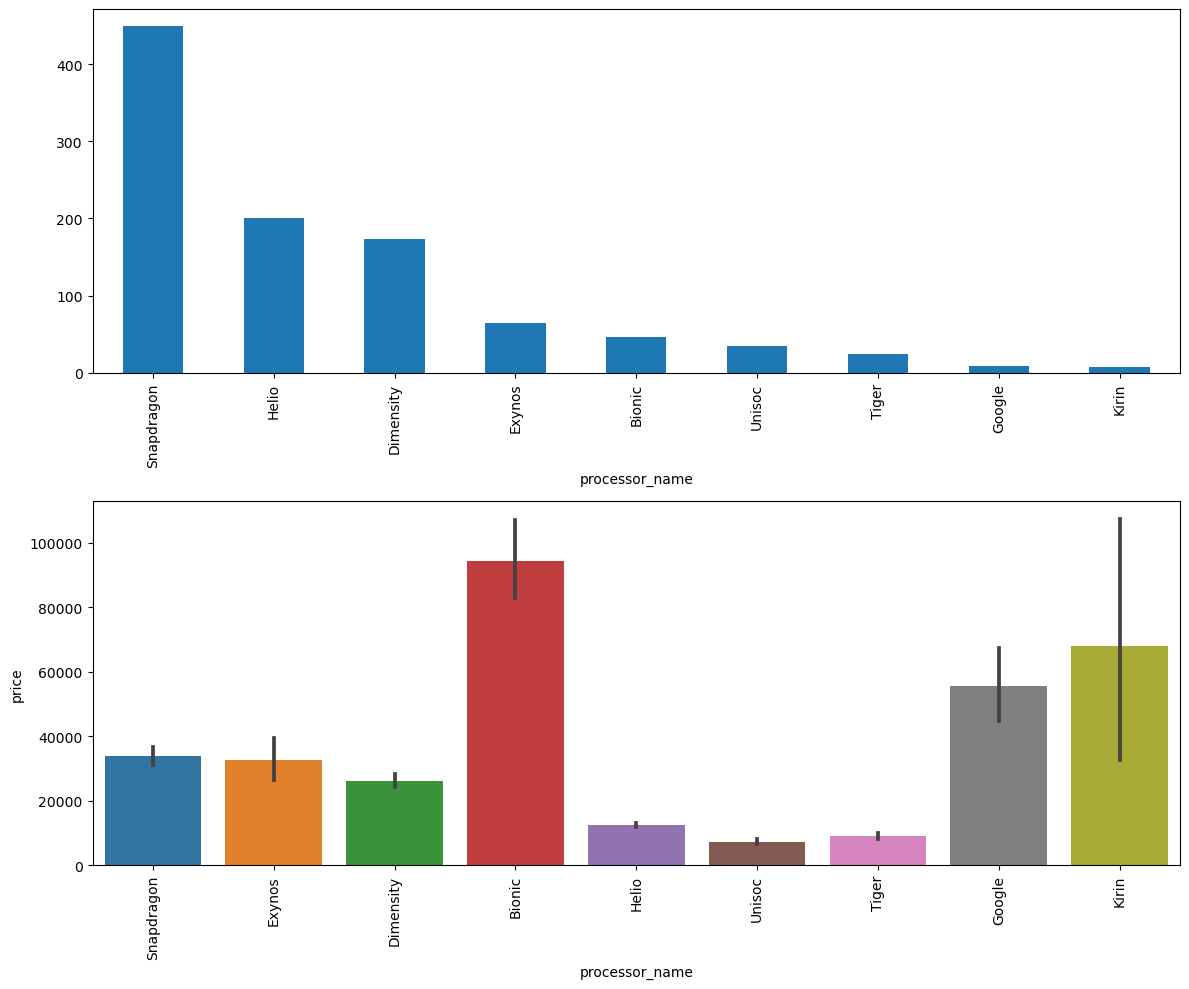

In [13]:
# processor name
plt.figure(figsize=(12,10))

plt.subplot(211)
df['processor_name'].value_counts().plot(kind='bar')
plt.tight_layout()

plt.subplot(212)
sns.barplot(x=df['processor_name'],y=df['price'])
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

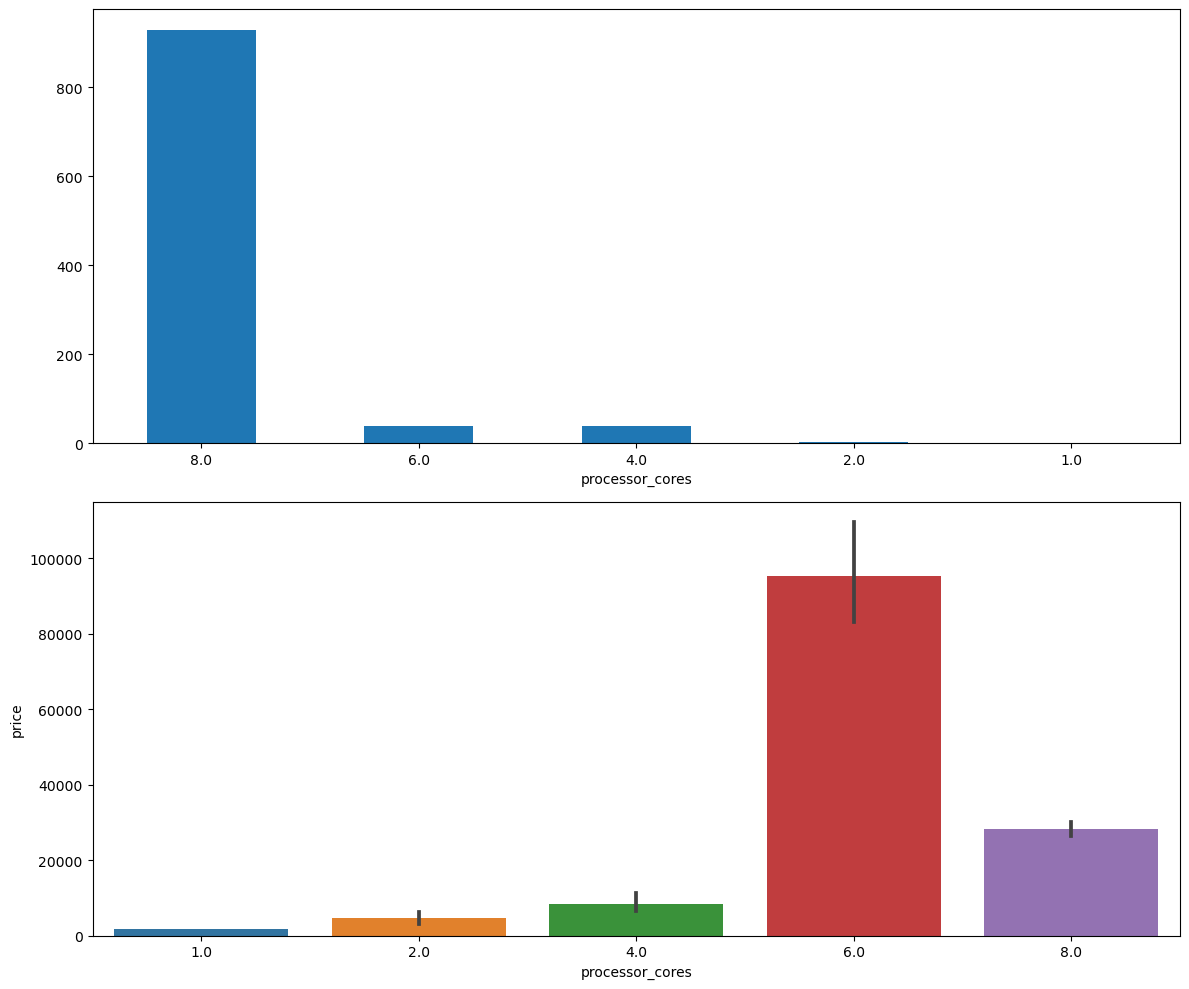

In [14]:
# processor cores
plt.figure(figsize=(12,10))

plt.subplot(211)
df['processor_cores'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.tight_layout()

plt.subplot(212)
sns.barplot(x=df['processor_cores'],y=df['price'])
plt.tight_layout()
plt.show()

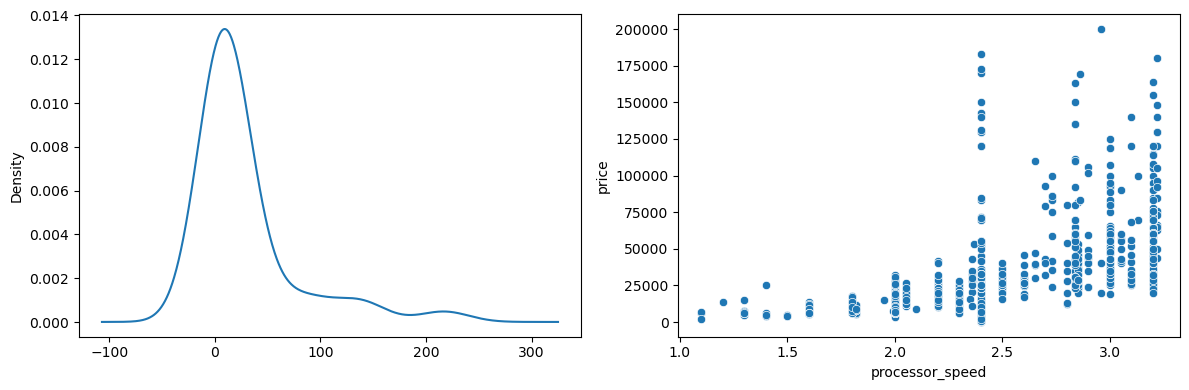

In [15]:
# processor speed
plt.figure(figsize=(12,4))

plt.subplot(121)
df['processor_speed'].value_counts().plot(kind='kde')
plt.tight_layout()

plt.subplot(122)
sns.scatterplot(x=df['processor_speed'],y=df['price'])
plt.tight_layout()

plt.show()

### 3. OS :

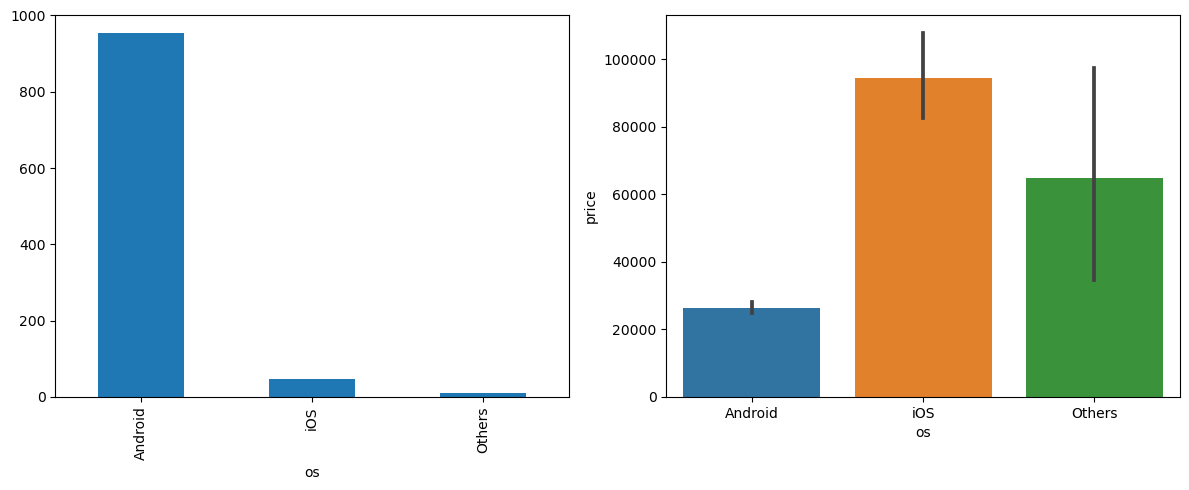

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(121)
df['os'].value_counts().plot(kind='bar')
plt.tight_layout()

plt.subplot(122)
sns.barplot(x=df['os'],y=df['price'])
plt.tight_layout()

plt.show()

### 4. Ram and Storage :

In [63]:
df['ram'] = [df['ram'][i] if (df['is_ram_gb'][i]==1) else df['ram'][i]/1000 for i in range(df.shape[0])]
df['storage'] = [df['storage'][i] if (df['is_storage_gb'][i]==1) else df['storage'][i]/1000 for i in range(df.shape[0])]

In [68]:
df.drop(['is_ram_gb','is_storage_gb'],axis=1,inplace=True)

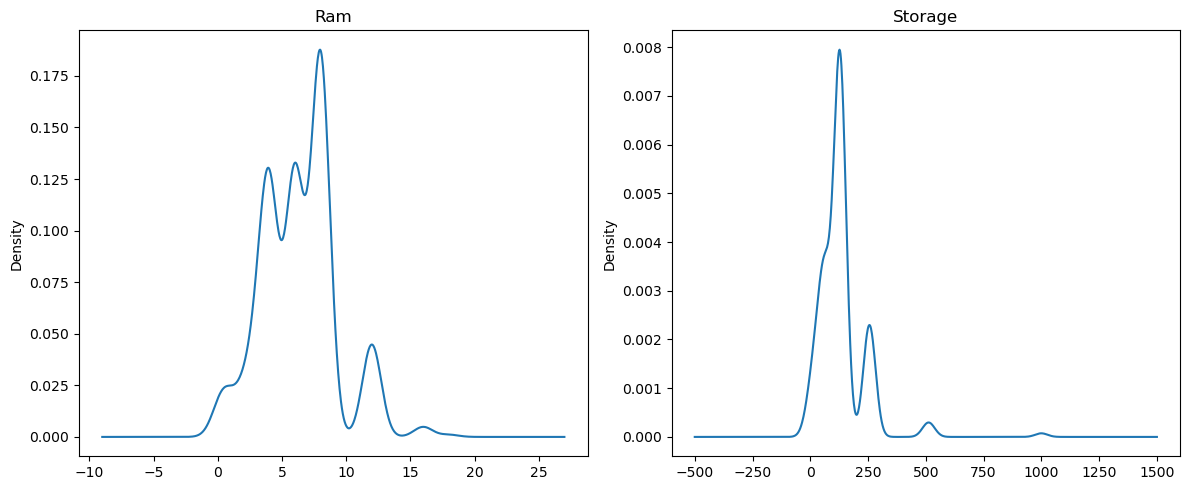

In [70]:
plt.figure(figsize=(12,5))

plt.subplot(121)
df['ram'].plot(kind='kde')
plt.title('Ram')
plt.tight_layout()

plt.subplot(122)
df['storage'].plot(kind='kde')
plt.title('Storage')
plt.tight_layout()

plt.show()

### 5. Battery :

<Axes: ylabel='Density'>

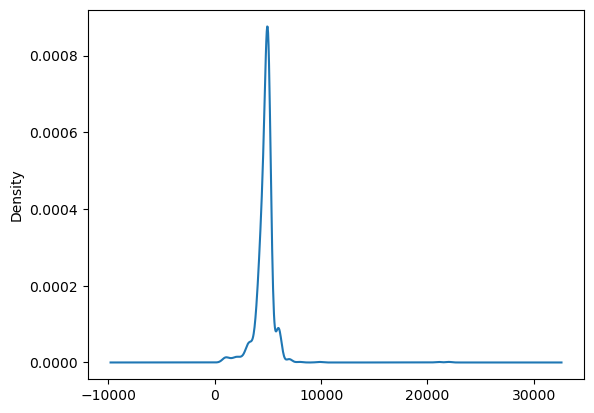

In [73]:
df['battery_capacity'].plot(kind='kde')

In [90]:
# outlier removal from battery_capacity
df = df.drop(list(df[df['battery_capacity']>10000].index),axis=0).reset_index(drop=True)

### 6. Features :

In [92]:
df.columns

Index(['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'storage', 'battery_capacity', 'DualSim', 'Volte', 'is_5G',
       'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size', 'display_height',
       'display_width', 'rear_camera', 'front_camera', 'price'],
      dtype='object')

In [95]:
# removing unneccessary features 
df.drop(['Volte','is_Vo5G','ngc','irblaster'],axis=1,inplace=True)

### 7. Display :

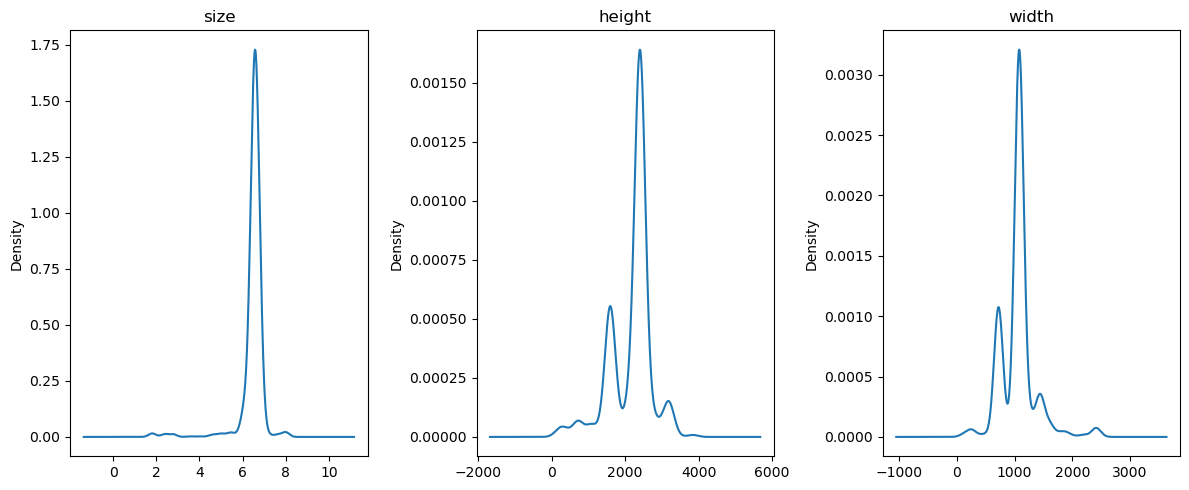

In [98]:
plt.figure(figsize=(12,5))

plt.subplot(131)
df['display_size'].plot(kind='kde')
plt.title('size')
plt.tight_layout()

plt.subplot(132)
df['display_height'].plot(kind='kde')
plt.title('height')
plt.tight_layout()

plt.subplot(133)
df['display_width'].plot(kind='kde')
plt.title('width')
plt.tight_layout()

plt.show()

In [103]:
# PPI ---> Pixels per inch
df['ppi'] = np.sqrt(df['display_height']**2 + df['display_width']**2)/df['display_size']

<Axes: xlabel='ppi', ylabel='price'>

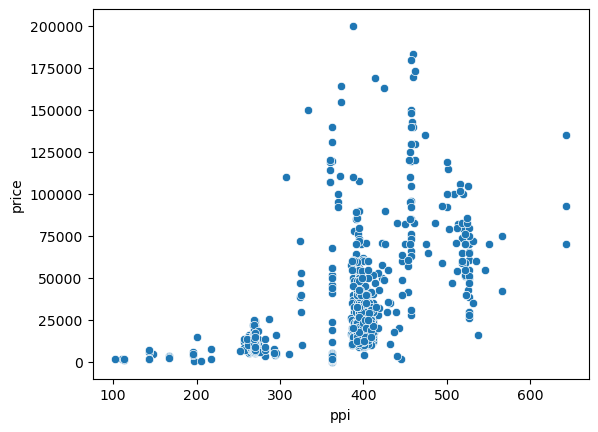

In [105]:
sns.scatterplot(x=df['ppi'],y=df['price'])

In [107]:
# again dropping extra columns
df.drop(['display_size','display_height','display_width'],axis=1,inplace=True)

### 8. Camera :

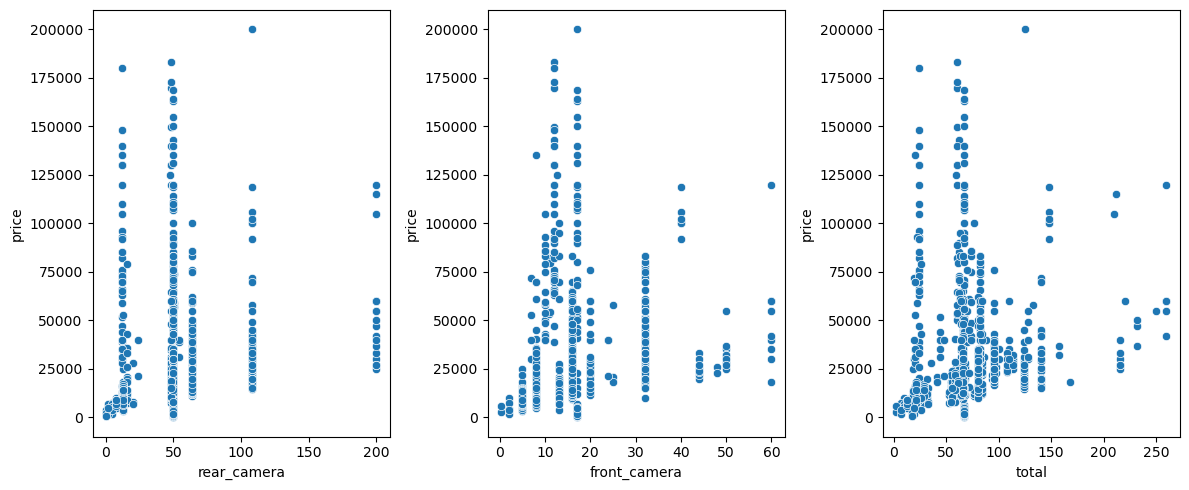

In [114]:
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.scatterplot(x=df['rear_camera'],y=df['price'])
plt.tight_layout()

plt.subplot(132)
sns.scatterplot(x=df['front_camera'],y=df['price'])
plt.tight_layout()

plt.subplot(133)
sns.scatterplot(x=df['rear_camera']+df['front_camera'],y=df['price'])
plt.xlabel('total')
plt.tight_layout()

plt.show()

In [119]:
df['camera'] = df['rear_camera']+df['front_camera']
df.drop(['rear_camera','front_camera'],axis=1,inplace=True)

In [122]:
df = df[['brand','processor_name','processor_cores','processor_speed','os','ram','storage','battery_capacity','DualSim','is_5G','wifi','ppi','camera','price']]

In [124]:
# exporting as csv file 
df.to_csv('smartphones.csv',index=False)